# Final Project: Predicting Exoplanet Confirmation
$
\newcommand{\xv}{\mathbf{x}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\uv}{\mathbf{u}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\bv}{\mathbf{b}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Chi}{\mathcal{X}}
\newcommand{\R}{\rm I\!R}
\newcommand{\sign}{\text{sign}}
\newcommand{\Ym}{\mathbf{Y}}
\newcommand{\Tm}{\mathbf{T}}
\newcommand{\Xm}{\mathbf{X}}
\newcommand{\Wm}{\mathbf{W}}
\newcommand{\Zm}{\mathbf{Z}}
\newcommand{\Um}{\mathbf{U}}
\newcommand{\Vm}{\mathbf{V}}
\newcommand{\Am}{\mathbf{A}}
\newcommand{\muv}{\boldsymbol\mu}
\newcommand{\Sigmav}{\boldsymbol\Sigma}
\newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:white"> *Abby Graber* </span>

## Utils

In [4]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, success_msg="", **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print(f"Your code PASSED all the code checks! {success_msg}")

In [6]:
from sklearn.datasets import make_regression

def nonlinear_data(m=100, n=3, seed=0):
    """ Toy data for testing """
    X, _ = make_regression(
        n_samples=m, 
        n_features=n, 
        n_informative=1,
        noise=3.5,
        random_state=seed,
    )
    rng = np.random.RandomState(seed)
    X[:, 0] = np.sort(6 * rng.rand(m, 1) - 3, axis=0).reshape(m,)
    y = (2 + .5* X[:, 0]**2 + X[:, 0]) + rng.rand(m)

    return X, y.reshape(-1, 1)

# Data Exploration

In [8]:
# Load Kepler Exoplanet Search Results dataset and store in 'cumulative_df'
cumulative_df = pd.read_csv("cumulative.csv")

Display of the newly created Pandas DataFrame using display()

In [10]:
display(cumulative_df)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


Get and print all feature names of the DataFrame

In [15]:
feature_names = cumulative_df.columns
print(f'The feature names are:\n{feature_names.values}')

The feature names are:
['rowid' 'kepid' 'kepoi_name' 'kepler_name' 'koi_disposition'
 'koi_pdisposition' 'koi_score' 'koi_fpflag_nt' 'koi_fpflag_ss'
 'koi_fpflag_co' 'koi_fpflag_ec' 'koi_period' 'koi_period_err1'
 'koi_period_err2' 'koi_time0bk' 'koi_time0bk_err1' 'koi_time0bk_err2'
 'koi_impact' 'koi_impact_err1' 'koi_impact_err2' 'koi_duration'
 'koi_duration_err1' 'koi_duration_err2' 'koi_depth' 'koi_depth_err1'
 'koi_depth_err2' 'koi_prad' 'koi_prad_err1' 'koi_prad_err2' 'koi_teq'
 'koi_teq_err1' 'koi_teq_err2' 'koi_insol' 'koi_insol_err1'
 'koi_insol_err2' 'koi_model_snr' 'koi_tce_plnt_num' 'koi_tce_delivname'
 'koi_steff' 'koi_steff_err1' 'koi_steff_err2' 'koi_slogg'
 'koi_slogg_err1' 'koi_slogg_err2' 'koi_srad' 'koi_srad_err1'
 'koi_srad_err2' 'ra' 'dec' 'koi_kepmag']


Get shape of the DataFrame

In [20]:
df_shape = cumulative_df.shape  # Get forestfire_df shape
print(f'The Kepler dataset shape is: {df_shape}')

The Kepler dataset shape is: (9564, 50)


Summary of the dataset

In [23]:
print(cumulative_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

# Visualization

### Pairplot Visualization

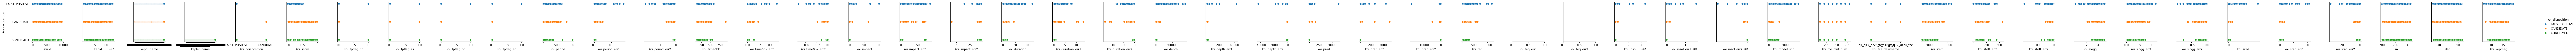

In [27]:
import seaborn as sns
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(cumulative_df)), size=3500, replace=False)

sample_data = cumulative_df.iloc[indices]
target = 'koi_disposition' # koi_disposition will be used as the target value
feature_columns = list(cumulative_df.drop(target, axis=1).columns)

sns.pairplot(
    data=sample_data,
    y_vars=target,
    x_vars=feature_columns,
    hue=target
)
plt.show()

### Scatterplot Visualization

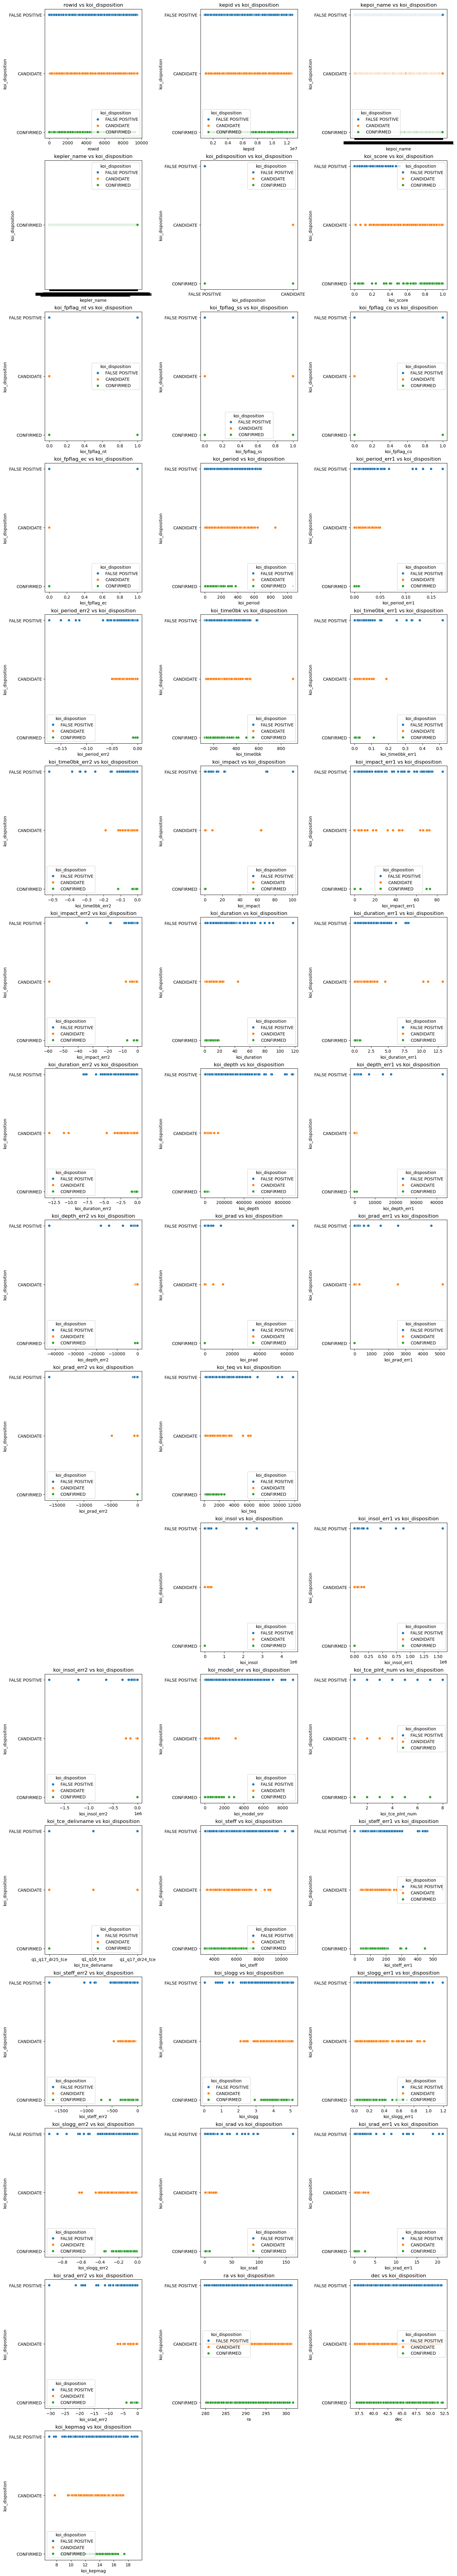

In [29]:
import math

num_features = len(feature_columns)
num_rows = math.ceil(num_features / 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, feature in enumerate(feature_columns):
    ax = axes[i]
    if sample_data[feature].notna().any():
        sns.scatterplot(
            data=sample_data,
            x=feature,
            y=target,
            hue=target,
            ax=ax,
        )
        ax.set_title(f'{feature} vs {target}')
        ax.legend(title=target)
    else:
        fig.delaxes(ax)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### Boxplot Visualization

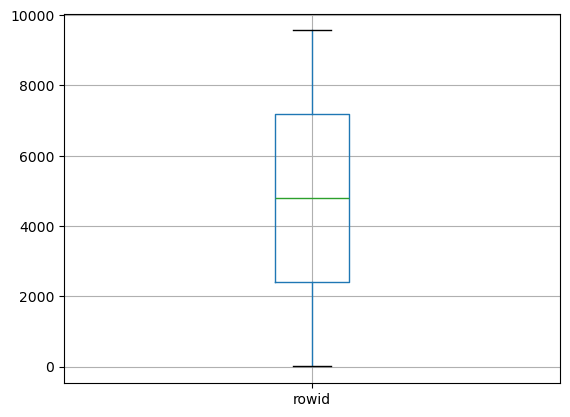

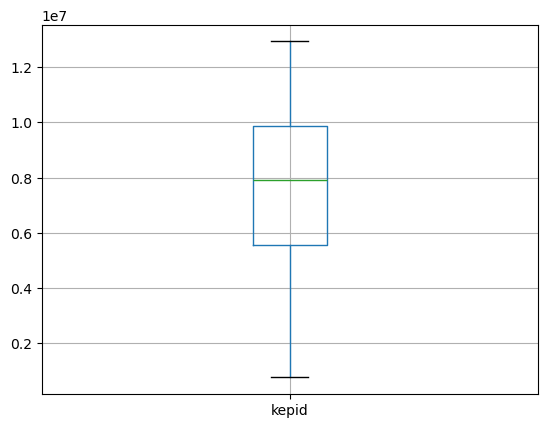

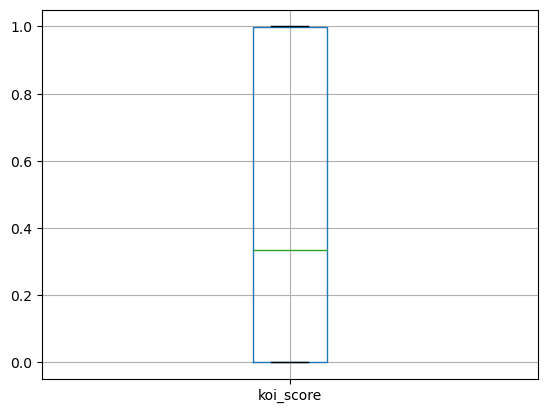

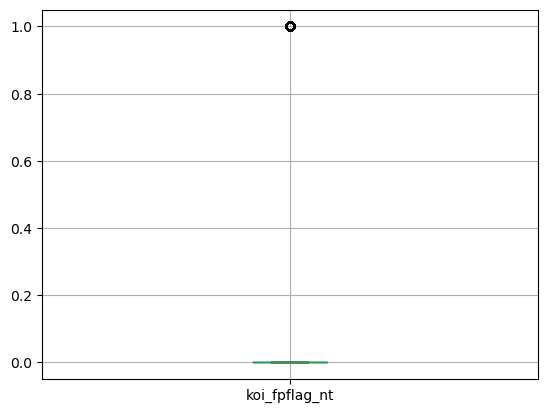

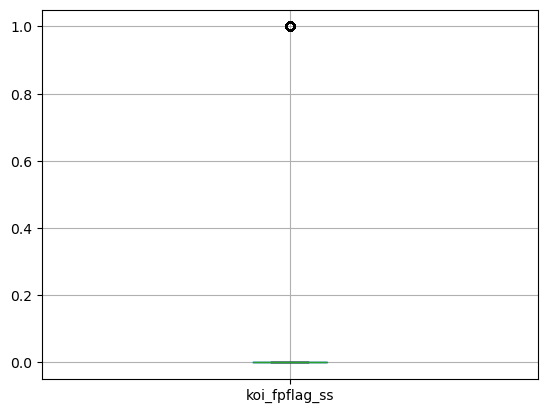

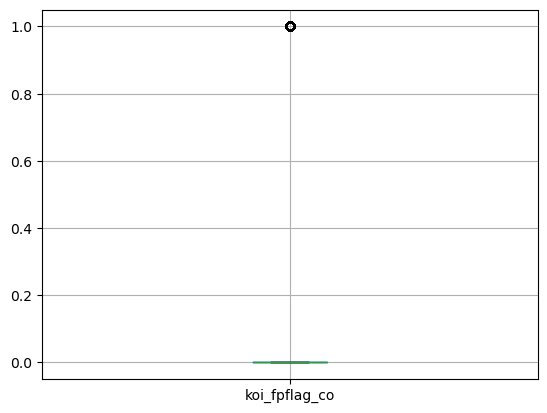

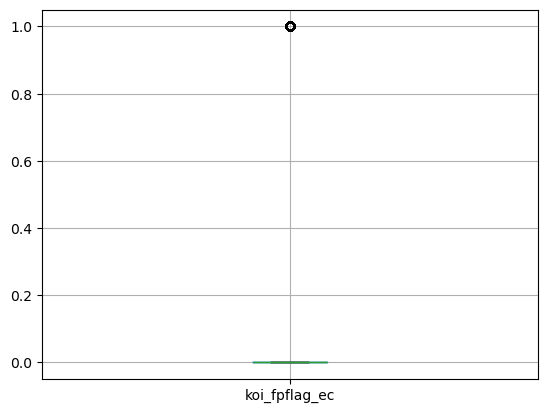

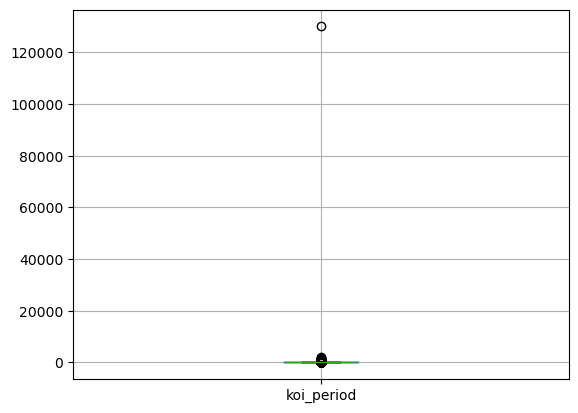

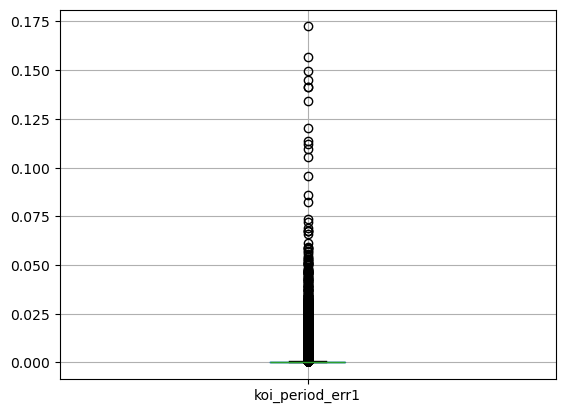

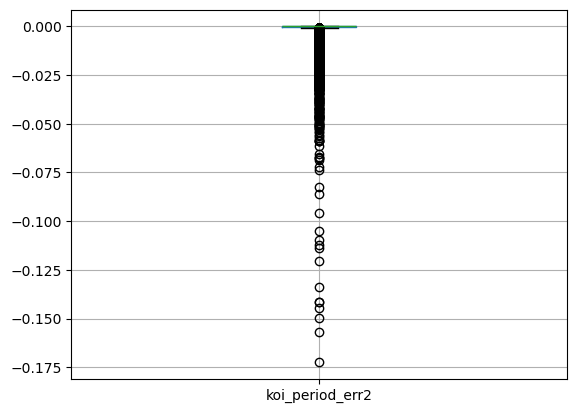

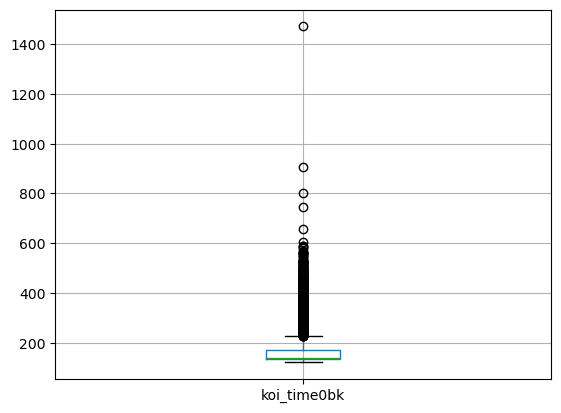

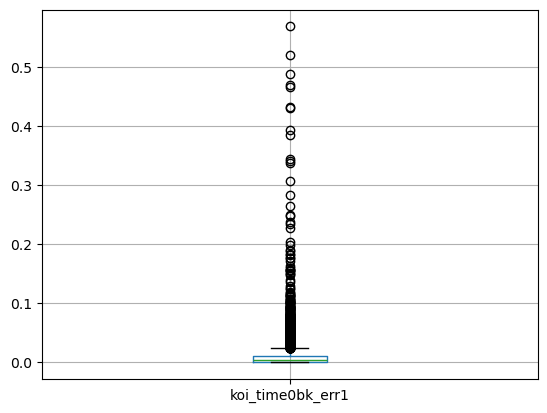

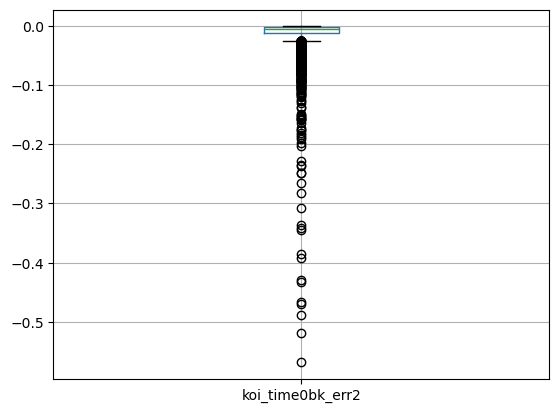

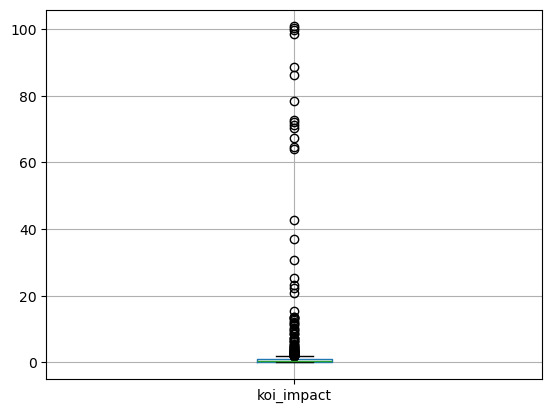

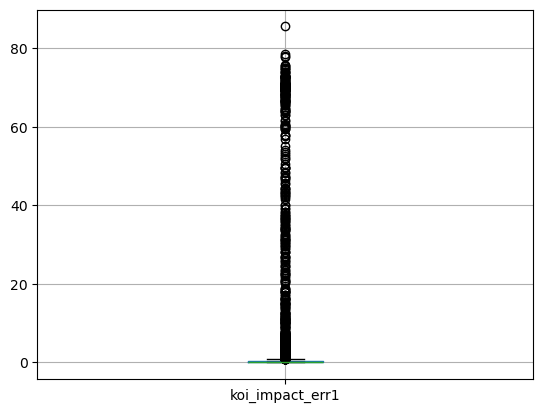

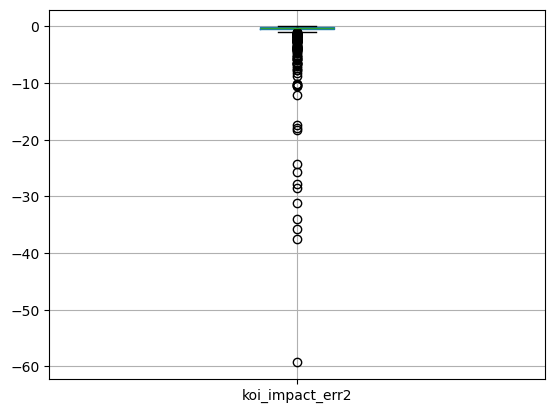

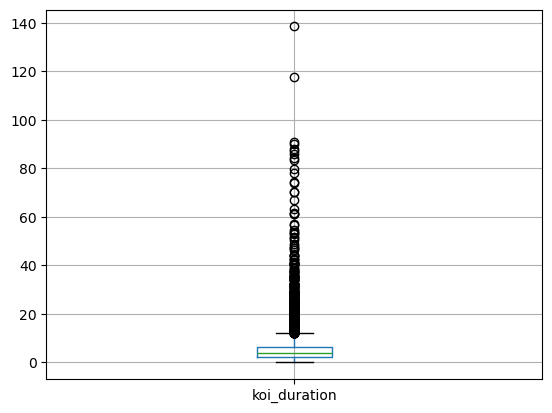

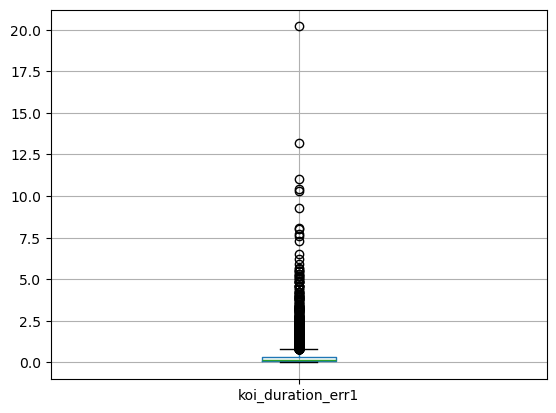

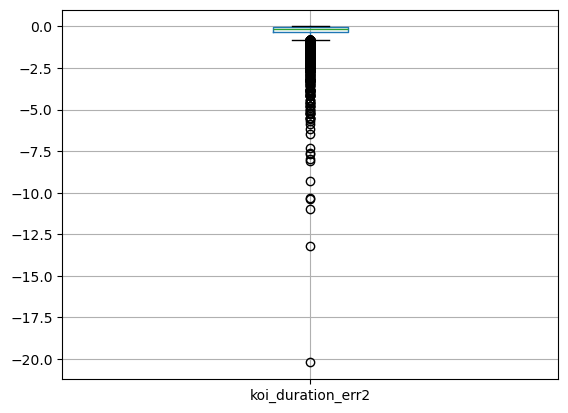

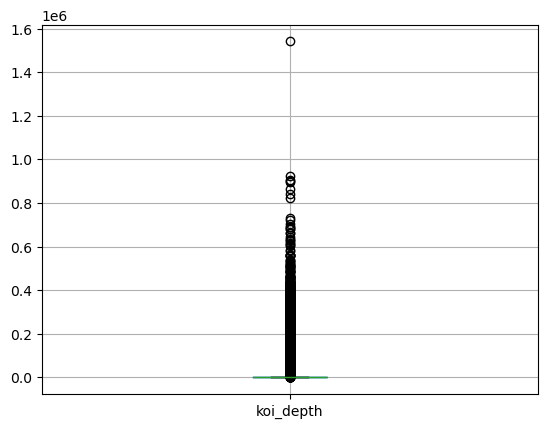

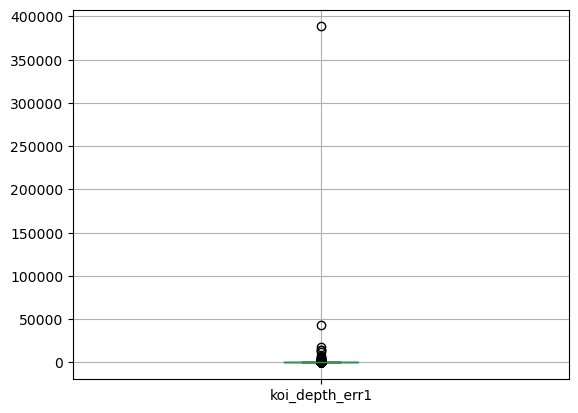

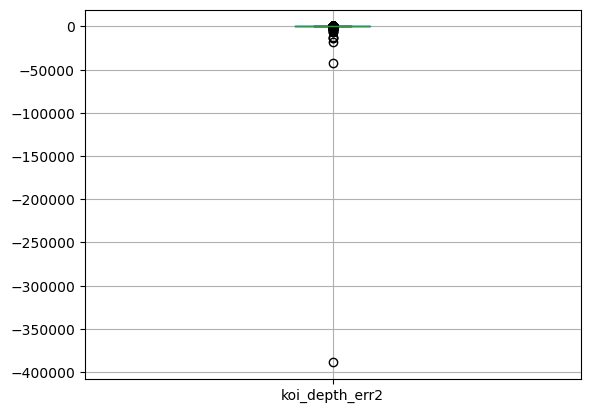

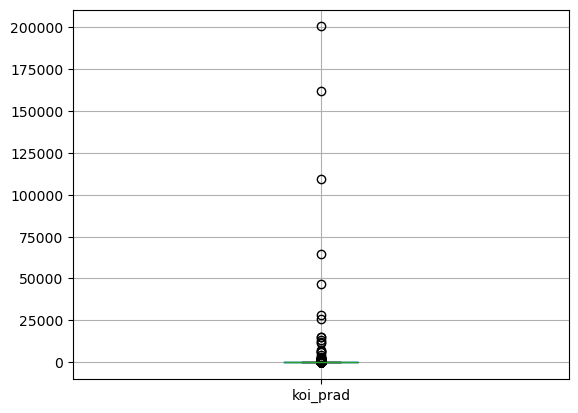

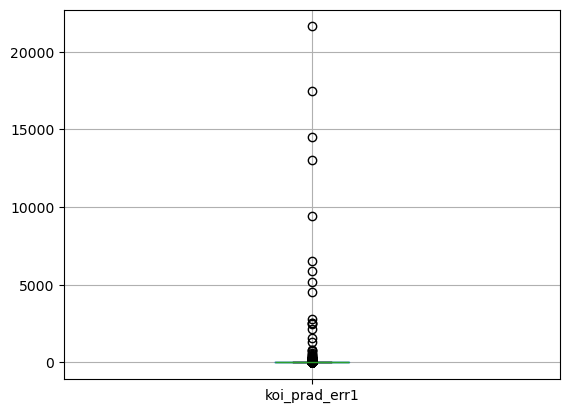

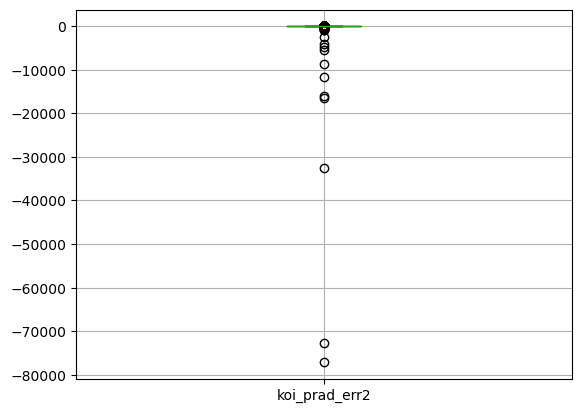

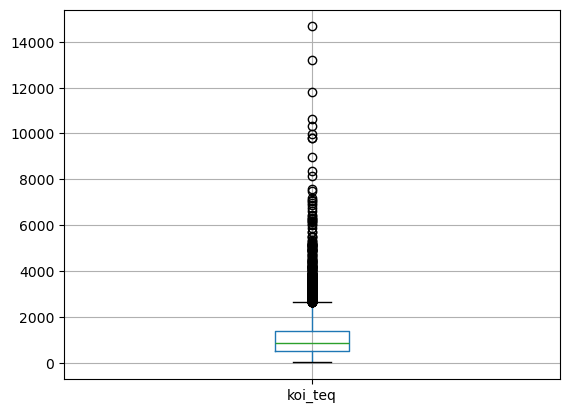

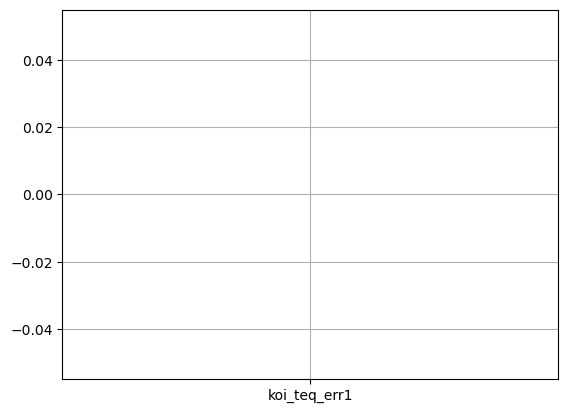

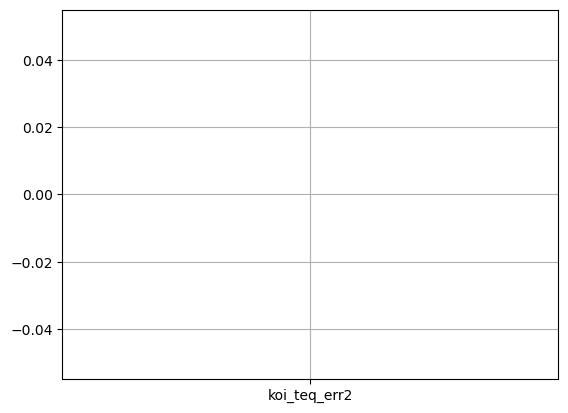

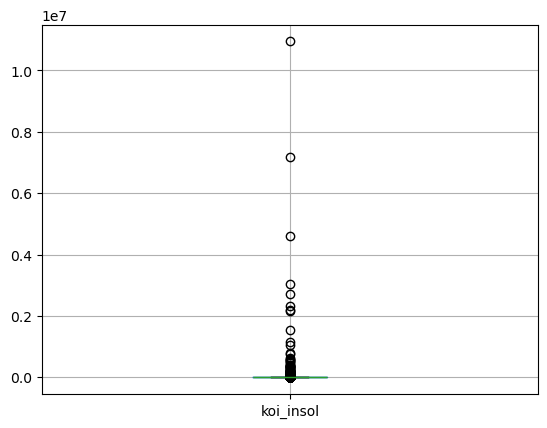

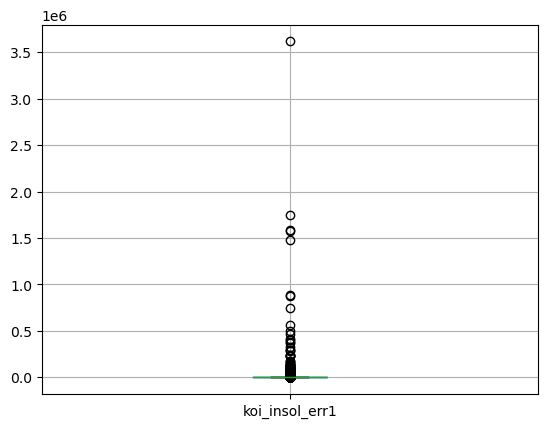

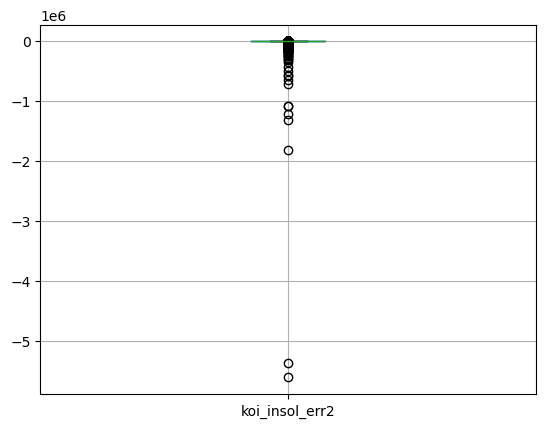

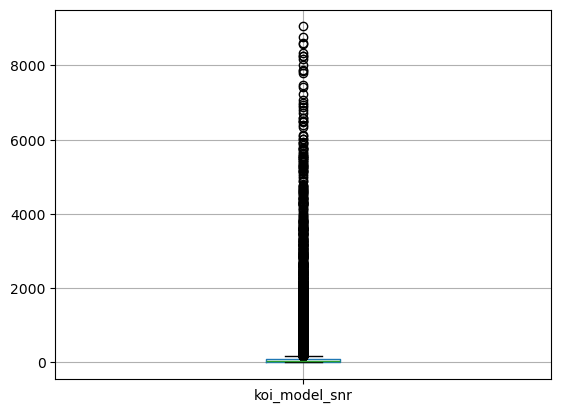

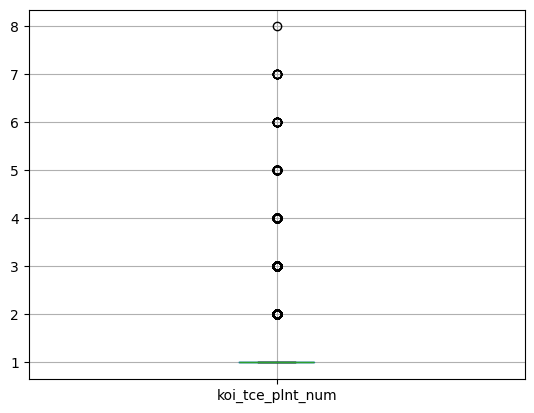

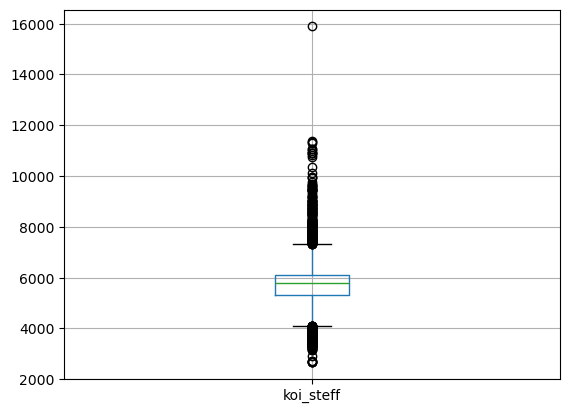

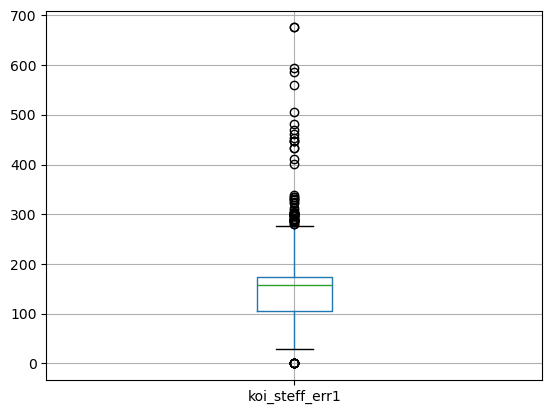

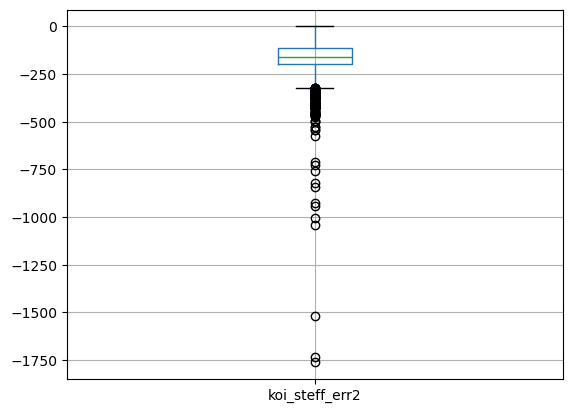

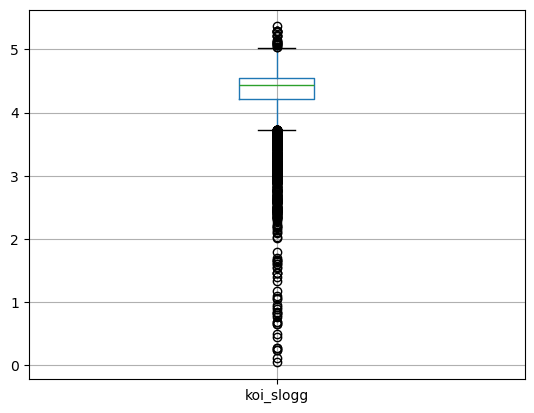

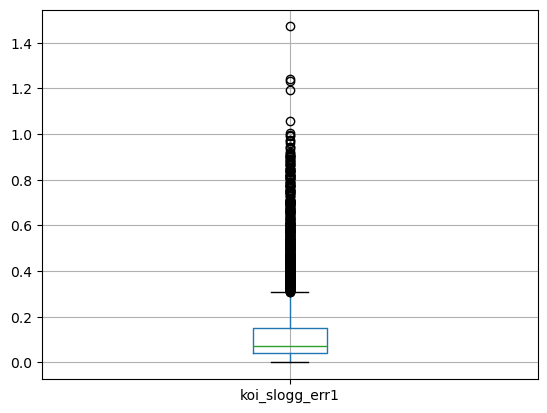

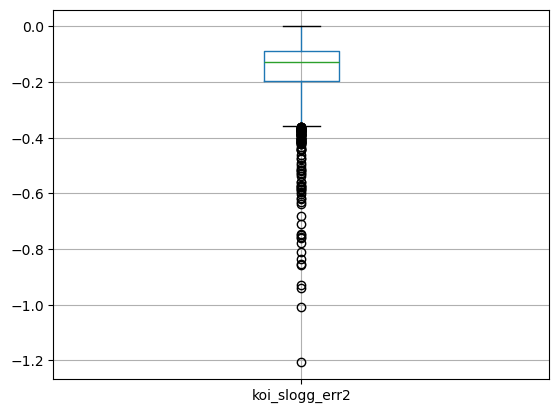

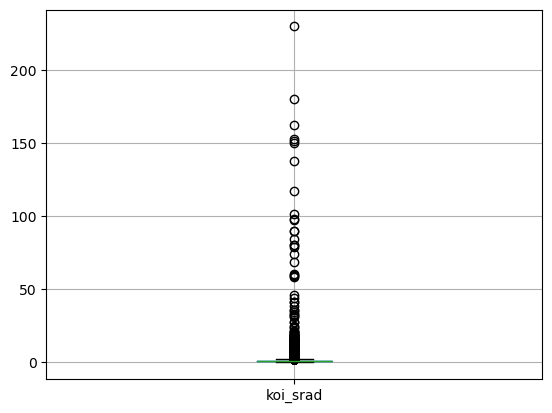

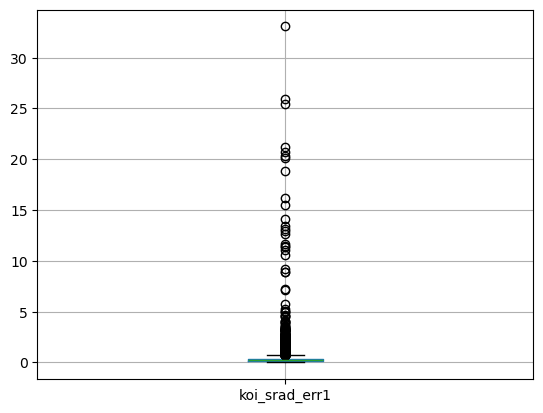

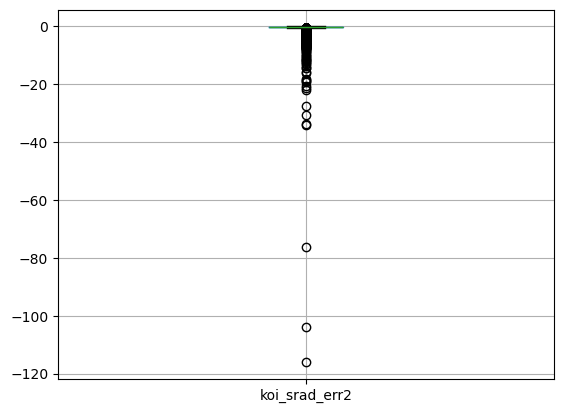

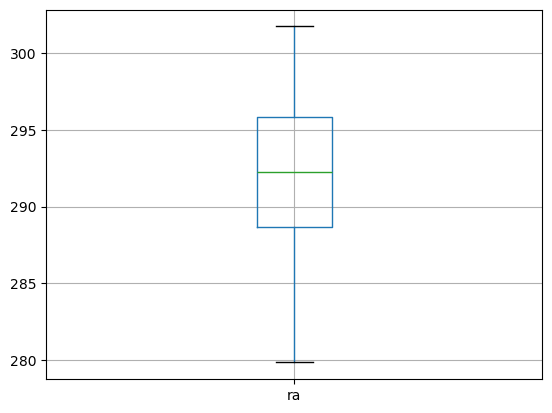

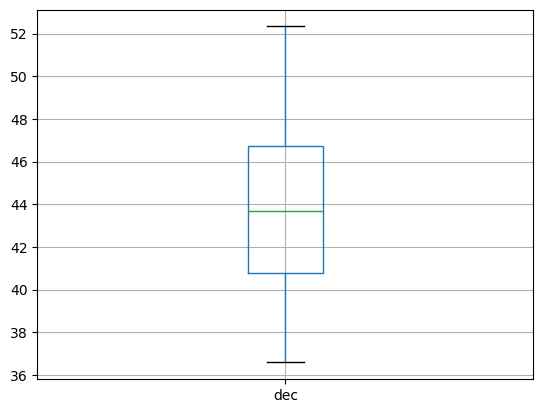

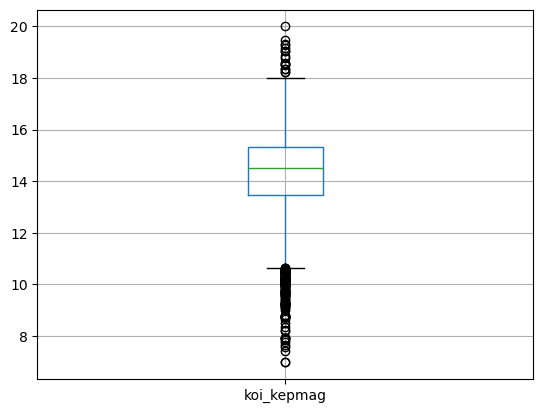

In [31]:
for column in cumulative_df.columns:
    if cumulative_df[column].dtype in ['int64', 'float64']:
        cumulative_df.boxplot(column)
        plt.show()

# Data Preprocessing

### Data Splitting

In [34]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

### Preprocess Data

In [408]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
def get_preprocessed_data(drop_features: List[str] = None) -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing
        Args:
            drop_features: List of feature names to drop from iris.data.
            
        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= None, None, None, None, None, None
    
    X = cumulative_df.drop('koi_disposition', axis=1)
    y = cumulative_df['koi_disposition']

    encoder = OneHotEncoder(sparse_output=False)
    y_onehot = encoder.fit_transform(y.values.reshape(-1,1))

    X = X.dropna(axis=1)

    if drop_features is not None:
        drop_features = [feature for feature in drop_features if feature in X.columns]
        if drop_features:
            X = X.drop(columns=drop_features)

    # One-hot encode categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    X = pd.get_dummies(X, columns=categorical_features)
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y_onehot)

    scaler = StandardScaler()
    
    X_trn = scaler.fit_transform(X_trn)
    
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [410]:
def TEST_get_preprocessed_data():
    nd = get_preprocessed_data()
    print("{:-^50}".format("No Dropped Features"))
    print(f"X_trn shape: {nd[0].shape}")
    print(f"y_trn shape: {nd[1].shape}")
    print(f"X_vld shape: {nd[2].shape}")
    print(f"y_vld shape: {nd[3].shape}")
    print(f"X_tst shape: {nd[4].shape}")
    print(f"y_tst shape: {nd[5].shape}")

TEST_get_preprocessed_data()

---------------No Dropped Features----------------
X_trn shape: (6120, 9577)
y_trn shape: (6120, 3)
X_vld shape: (1531, 9577)
y_vld shape: (1531, 3)
X_tst shape: (1913, 9577)
y_tst shape: (1913, 3)


# Naive Bayes

### Metrics

In [413]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

#### plot_decision_boundary()

In [415]:
def plot_decision_boundary(
    gnb: object, 
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    class_names: Dict = None
) -> None:
    """ Plots the decision boundry for data with 2 features. 
    
        Warning: 
            If you have more than 2 features (2D data) the decision boundry
            can not be plotted.
    
        Args:
            gnb: An instance of GaussianNaiveBayes class
            
            X: Data to be plotted

            y: Labels for corresponding data

            xlabel: X-axis label for plot

            ylabel: Y-axis label for plot
            
            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    """
    assert X.shape[-1] >= 2, f"`X` must have at least 2 features not {X.shape[-1]}"
    
    if class_names is None:
        class_names = {}

    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)

    # Make prediction
    y_hat = gnb.predict(fake_data)

    # Plot
    plt.contourf(xx, yy, y_hat.reshape(xx.shape))
    
    labels = np.unique(y)
    for l in labels:
        class_locs = np.where(y == l)[0]
        class_name = class_names.get(l, f'class {l}')
        plt.scatter(X[class_locs, 0], X[class_locs, 1], label=class_name)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

#### plot_confusion_matrix()

In [417]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True)
    plt.show()
    return cfm_df

### Coding Gaussian Naive Bayes

In [419]:
def compute_log_priors(y: np.ndarray) -> np.ndarray:
    """ Computes the log priors for each class
    
        Args:
            y: The labels/tagets given as a vector. 

        Returns:
            1D vector of log priors for each class in ascending order labels.
    """
    if len(y.shape) > 1 and y.shape[1] > 1:
        y_classes = np.argmax(y, axis=1)
    else:
        y_classes = y
    unique_labels, counts = np.unique(y_classes, return_counts=True)
    log_priors = np.log(counts / len(y_classes))
    return log_priors

In [420]:
def TEST_compute_log_priors():
    _, y_trn, _, _, _, _ = get_preprocessed_data()
    print(f"y_trn shape: {y_trn.shape}")
    # Compute the log priors
    log_priors = compute_log_priors(y_trn)
    print(f"Estimated log priors: {log_priors}")
    print(f"Estimated priors: {np.exp(log_priors)}")

TEST_compute_log_priors()

y_trn shape: (6120, 3)
Estimated log priors: [-1.45668877 -1.41749503 -0.64497968]
Estimated priors: [0.23300654 0.24232026 0.5246732 ]


### Computing log likelihoods: $\log P(X | Y)$

#### Gaussian distribution

In [429]:
from typing import Union
def log_gaussian(
    x: np.ndarray, 
    mu: Union[np.ndarray, float], 
    sigma: Union[np.ndarray, float],
) -> np.ndarray:
    """ Computes the value at a given point in a Gaussian distribution
    
        Args:
            x: Data given as a NumPy a matrix or vector.
            
            mu: Feature means given as a NumPy vector or float.
            
            sigma: Feature standard deviations given as a NumPy vector or float.
            
        Returns:
            A NumPy array of feature log liklihoods equal to the shape of x.
    """
    # TODO 4
    epsilon = 1e-8  # Small value to prevent divide-by-zero
    sigma = np.where(sigma == 0, epsilon, sigma)  # Replace zero std deviations with epsilon
    
    gaussian = (-0.5 * np.log(sigma**2 * 2 * np.pi)) + (-0.5 * ((x - mu) / sigma)**2)
    return gaussian

mat_x_values shape: (60, 2)
mat_y_values shape: (60, 2)
vec_x_values shape: (120, 1)
vec_y_values shape: (120, 1)


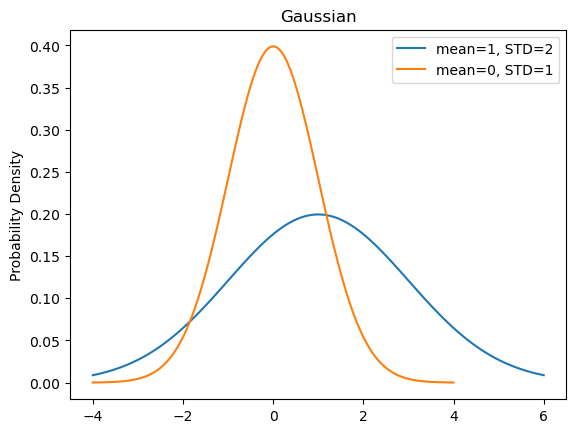

In [431]:
def TEST_gaussian_distribution():
    mu, sigma = 1, 2
    mat_x_values = np.linspace(-4, 6, 120).reshape(-1, 2)
    mat_y_values = log_gaussian(mat_x_values, mu, sigma)
    print(f"mat_x_values shape: {mat_x_values.shape}")
    print(f"mat_y_values shape: {mat_y_values.shape}")
    plt.plot(mat_x_values.flatten(), np.exp(mat_y_values.flatten()), label='mean=1, STD=2')

    mu, sigma = 0, 1
    vec_x_values = np.linspace(-4, 4, 120).reshape(-1, 1)
    vec_y_values = log_gaussian(vec_x_values, mu, sigma)
    print(f"vec_x_values shape: {vec_x_values.shape}")
    print(f"vec_y_values shape: {vec_y_values.shape}")
    plt.plot(vec_x_values, np.exp(vec_y_values), label='mean=0, STD=1')
    
    plt.title(f"Gaussian")
    plt.ylabel(f"Probability Density")
    plt.legend()
    plt.show()

TEST_gaussian_distribution()

#### Computing parameters: $\mu$ and $\sigma$

In [434]:
feature_names = cumulative_df['koi_disposition'].unique()

# Print the class names
print("Class Names:", feature_names)

Class Names: ['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


In [436]:
def compute_parameters(
    X: np.ndarray, 
    y: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray]:
    """ Computes the means and standard deviations for classes and features
    
        Args:
            X: Data given as a 2D matrix 
            
            y: Labels given as a 2D column vector

        Returns:
            Two NumPy arrays corresponding to the mean and STDs for each class and feature,
            such that each array has the shape (|K|, N).
    """
    means = []
    stds = []

    y_classes = np.argmax(y, axis=1)
    
    K = np.unique(y_classes)

    for k in K:
        curr_class = X[y_classes == k]

        mu = np.mean(curr_class, axis=0)
        means.append(mu)

        sigma = np.std(curr_class, axis=0)
        stds.append(sigma)

    means = np.array(means)
    stds = np.array(stds)
    
    return means, stds

In [438]:
def TEST_compute_parameters():
    """ Tests compute_parameters() with no dropped features """
    X_trn, y_trn, _, _, _, _ = get_preprocessed_data()
    print("{:-^50}".format("No Dropped Features"))
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")

    features = [i for i in range(X_trn.shape[1])]
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)

    print(f"{means.shape}")

    means_df = pd.DataFrame(means, index=feature_names, columns=features)
    print("{:=^50}".format("Keppler Training Data Feature Means"))
    display(means_df)
    stds_df = pd.DataFrame(stds, index=feature_names, columns=features)
    print("{:=^50}".format("Keppler Training Data Feature STDs"))
    display(stds_df)

TEST_compute_parameters()

---------------No Dropped Features----------------
X_trn shape: (6120, 9577)
y_trn shape: (6120, 3)
(3, 9577)
=======Keppler Training Data Feature Means========


,0,1,2,3,4,5,6,7,8,9,...,9567,9568,9569,9570,9571,9572,9573,9574,9575,9576
CONFIRMED,0.052536,0.029710,-0.482058,-0.514354,-0.490791,-0.367157,0.094351,0.085728,-0.104424,-0.056462,...,0.0,0.0,-0.012784,0.0,0.0,-0.012784,-0.012784,-0.012784,1.060660,-1.060660
FALSE POSITIVE,-0.881271,0.133926,-0.456200,-0.520435,-0.485677,-0.365073,-0.286130,-0.128098,-0.210912,-0.207616,...,0.0,0.0,-0.012784,0.0,0.0,-0.012784,-0.012784,-0.012784,1.021482,-1.021482
CANDIDATE,0.383684,-0.075047,0.424777,0.468787,0.442269,0.331663,0.090248,0.021091,0.143784,0.120962,...,0.0,0.0,0.011581,0.0,0.0,0.011581,0.011581,0.011581,-0.942809,0.942809


========Keppler Training Data Feature STDs========


,0,1,2,3,4,5,6,7,8,9,...,9567,9568,9569,9570,9571,9572,9573,9574,9575,9576
CONFIRMED,0.943102,1.008883,9.436896e-15,0.279128,2.775558e-15,1.010303e-14,1.082499,1.114369,0.732824,1.023299,...,0.0,0.0,1.023487e-16,0.0,0.0,1.023487e-16,1.023487e-16,1.023487e-16,2.975398e-14,2.975398e-14
FALSE POSITIVE,0.644797,0.987558,2.558071e-01,0.252677,1.136010e-01,8.023280e-02,0.457176,0.673393,0.451092,0.985748,...,0.0,0.0,5.377643e-17,0.0,0.0,5.377643e-17,5.377643e-17,5.377643e-17,2.774104e-01,2.774104e-01
CANDIDATE,0.900999,0.994580,1.223099e+00,1.174528,1.220029e+00,1.292886e+00,1.113154,1.064773,1.235886,0.977845,...,0.0,0.0,1.380459e+00,0.0,0.0,1.380459e+00,1.380459e+00,1.380459e+00,3.486100e-14,3.486100e-14


In [439]:
drop_features = ['kepoi_name', 'kepler_name', 'koi_disposition',
                 'koi_score', 'koi_fpflag_ec', 'koi_period_err1', 
                 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2',
                 'koi_impact_err1', 'koi_impact_err2',
                 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1',
                 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
                 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1',
                 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
                 'koi_steff_err1', 'koi_steff_err2', 
                 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2']

columns = ['koi_period', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 
           'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']

In [440]:
def TEST_compute_parameters_with_dropped_features():
    """ Tests compute_parameters() with dropped features """
    X_trn, y_trn, _, _, _, _ = get_preprocessed_data(drop_features=drop_features)
    
    print("{:-^50}".format("Dropped Features"))
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")

    target = np.unique(np.argmax(y_trn, axis=1))
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)

    print(f"Means shape: {means.shape}")

    means_df = pd.DataFrame(means, index=feature_names, columns=columns[:means.shape[1]])
    print("{:=^50}".format("Kepler Training Data Feature Means"))
    display(means_df)
    stds_df = pd.DataFrame(stds, index=feature_names, columns=columns[:stds.shape[1]])
    print("{:=^50}".format("Kepler Training Data Feature STDs"))
    display(stds_df)

TEST_compute_parameters_with_dropped_features()

-----------------Dropped Features-----------------
X_trn shape: (6120, 11)
y_trn shape: (6120, 3)
Means shape: (3, 11)
========Kepler Training Data Feature Means========


,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
CONFIRMED,0.052536,0.029710,-0.482058,-0.514354,-0.490791,0.094351,-0.104424,-0.056462,0.032056,1.060660,-1.060660
FALSE POSITIVE,-0.881271,0.133926,-0.456200,-0.520435,-0.485677,-0.286130,-0.210912,-0.207616,0.135453,1.021482,-1.021482
CANDIDATE,0.383684,-0.075047,0.424777,0.468787,0.442269,0.090248,0.143784,0.120962,-0.076795,-0.942809,0.942809


========Kepler Training Data Feature STDs=========


,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
CONFIRMED,0.943102,1.008883,9.436896e-15,0.279128,2.775558e-15,1.082499,0.732824,1.023299,1.010576,2.975398e-14,2.975398e-14
FALSE POSITIVE,0.644797,0.987558,2.558071e-01,0.252677,1.136010e-01,0.457176,0.451092,0.985748,1.000707,2.774104e-01,2.774104e-01
CANDIDATE,0.900999,0.994580,1.223099e+00,1.174528,1.220029e+00,1.113154,1.235886,0.977845,0.987459,3.486100e-14,3.486100e-14


#### Computing log likelihoods

In [442]:
def compute_log_likelihoods(X, means, stds, verbose=True):
    """ Computes the log likelihoods for all classes and data samples
    
        Args:
            X: Data to compute log likelihoods given as a matrix.
            
            means: Means for each class and feature of shape (|K|, N).
            
            stds: Standard deviations for each class and feature of shape (|K|, N).

        Returns:
            NumPy matrix containing ALL class log likelihoods with shape (M, |K|) where
            M is the number of data samples in the passed data X and |K| is the number 
            of classes given by the number of rows in means and stds.
    """
    log_likelihoods = []
    # TODO 6
    for mu, sigma in zip(means, stds):
        feature_log = log_gaussian(X, mu, sigma)

        class_log = np.sum(feature_log, axis=1)

        log_likelihoods.append(class_log)

    log_likelihoods = np.array(log_likelihoods).T
    return log_likelihoods

In [443]:
def TEST_compute_log_likelihoods():
    X_trn, y_trn, _, _, _, _ = get_preprocessed_data()
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)
    # Compute log likelihoods
    log_likelihoods = compute_log_likelihoods(X_trn, means, stds)
    print(f"log_likelihoods shape: {log_likelihoods.shape}")
    print("{:=^50}".format("Kepler Class Log Liklihoods"))
    ll_df = pd.DataFrame(log_likelihoods, columns=feature_names)
    display(ll_df)

    return log_likelihoods

log_likelihoods = TEST_compute_log_likelihoods()

X_trn shape: (6120, 9577)
y_trn shape: (6120, 3)
log_likelihoods shape: (6120, 3)
===========Kepler Class Log Liklihoods============


,CONFIRMED,FALSE POSITIVE,CANDIDATE
0,-2.921652e+35,-1.058299e+36,1.558396e+05
1,2.235178e+05,-1.058299e+36,-8.107666e+34
2,-2.921652e+35,-1.058299e+36,1.558343e+05
3,-2.921648e+35,2.242378e+05,-8.107666e+34
4,-2.921648e+35,-1.058299e+36,1.558404e+05
...,...,...,...
6115,-2.921648e+35,-1.058299e+36,1.558357e+05
6116,-2.921648e+35,-1.058299e+36,1.558371e+05
6117,2.235173e+05,-1.058299e+36,-8.107666e+34
6118,-2.921648e+35,-1.058299e+36,1.558399e+05


### GaussianNaiveBayes Class

In [458]:
class GaussianNaiveBayes():
    """ Performs multi-classifcation using Gaussian Naive Bayes

        Attributes:
            log_priors: The log of the priors computed based on the training data 

            means: The means for each class and every feature with shape (|K|, N).

            stds: The standard deviations for each class and every feature 
                with shape (|K|, N).
    """
    def __init__(self):
        self.log_priors = None
        self.means = None
        self.stds = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Compute the log_priors, means, and STDs using training data.
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        # TODO 7
        self.log_priors = compute_log_priors(y)

        self.means, self.stds = compute_parameters(X, y)
        
        return self
        
    def predict(self, X: np.ndarray):
        """ Make a prediction using log maximum a posteriori (MAP)
        
            Args:
                X: Data given as a 2D matrix.

            Returns:
                Preductions given as a 2D column vctor.
        """
        # TODO 7
        log_likelihoods = compute_log_likelihoods(X, self.means, self.stds)

        preds = np.argmax((log_likelihoods + self.log_priors), axis=1)
        return preds

Fake X shape: (100, 2)
Fake y shape: (100, 1)
Accuracy: 0.5


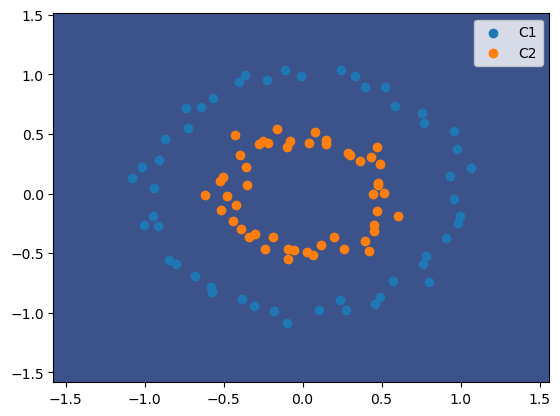

In [460]:
def TEST_GaussianNaiveBayes():
    from sklearn.datasets import make_circles
    X, y = make_circles(random_state=42, factor=.5, noise=.05)
    y = y.reshape(-1, 1)
    class_names = {
        0: 'C1',
        1: 'C2',
    }
    print(f"Fake X shape: {X.shape}")
    print(f"Fake y shape: {y.shape}")
    
    gnb = GaussianNaiveBayes()
    gnb.fit(X, y)
    y_hat = gnb.predict(X)
    acc = accuracy_score(y, y_hat)
    print(f"Accuracy: {acc}")
    plot_decision_boundary(gnb=gnb, X=X, y=y, class_names=class_names)

TEST_GaussianNaiveBayes()

### Multi-class Classification

#### Training

Training Accuracy: 0.7576797385620915


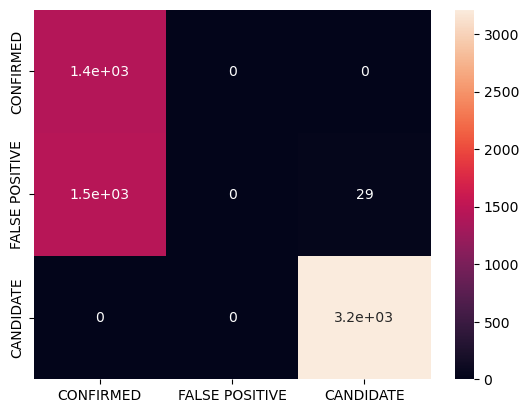

,CONFIRMED,FALSE POSITIVE,CANDIDATE
CONFIRMED,1426,0,0
FALSE POSITIVE,1454,0,29
CANDIDATE,0,0,3211


In [468]:
class_names = {
        0: 'CONFIRMED',
        1: 'FALSE POSITIVE',
        2: 'CANDIDATE'
    }
#### TODO 8: Training Code
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(
        drop_features=drop_features
    )
gnb = GaussianNaiveBayes()
gnb.fit(X_trn, y_trn)
y_hat = gnb.predict(X_trn)
y_true = np.argmax(y_trn, axis=1)

acc = accuracy_score(y_true, y_hat)
print(f"Training Accuracy: {acc}")

plot_confusion_matrix(y=y_true, y_hat=y_hat, class_names=class_names)

#### Validation

Valadation Accuracy: 0.767472240365774


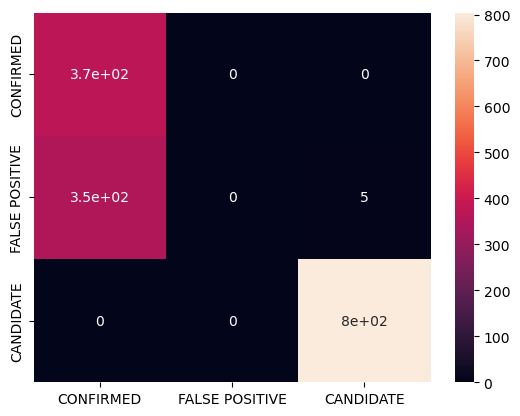

,CONFIRMED,FALSE POSITIVE,CANDIDATE
CONFIRMED,371,0,0
FALSE POSITIVE,351,0,5
CANDIDATE,0,0,804


In [470]:
# TODO 8: Validation Code
y_true = np.argmax(y_vld, axis=1)
y_hat = gnb.predict(X_vld)
acc = accuracy_score(y_true, y_hat)
print(f"Valadation Accuracy: {acc}")

plot_confusion_matrix(y=y_true, y_hat=y_hat, class_names=class_names)

#### Testing

Testing Accuracy: 0.7626764244641924


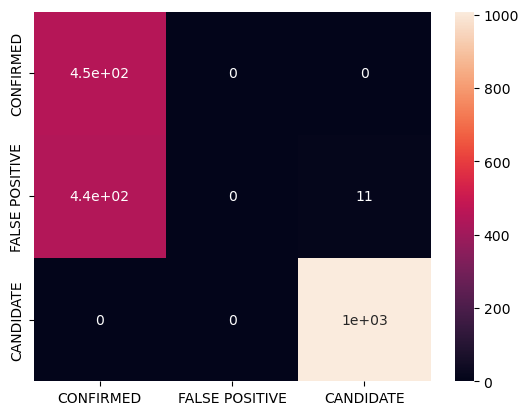

,CONFIRMED,FALSE POSITIVE,CANDIDATE
CONFIRMED,451,0,0
FALSE POSITIVE,443,0,11
CANDIDATE,0,0,1008


In [474]:
# TODO 8: Testing Code
y_true = np.argmax(y_tst, axis=1)
y_hat = gnb.predict(X_tst)
acc = accuracy_score(y_true, y_hat)
print(f"Testing Accuracy: {acc}")

plot_confusion_matrix(y=y_true, y_hat=y_hat, class_names=class_names)

### All Features

#### Training

Training Accuracy: 1.0


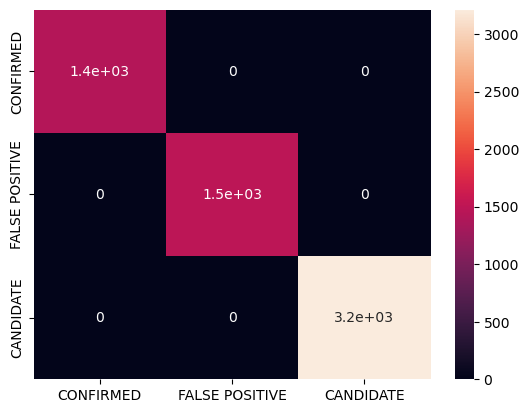

,CONFIRMED,FALSE POSITIVE,CANDIDATE
CONFIRMED,1426,0,0
FALSE POSITIVE,0,1483,0
CANDIDATE,0,0,3211


In [476]:
class_names = {
        0: 'CONFIRMED',
        1: 'FALSE POSITIVE',
        2: 'CANDIDATE'
    }
#### TODO 9: Training Code
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

gnb = GaussianNaiveBayes()
gnb.fit(X_trn, y_trn)
y_true = np.argmax(y_trn, axis=1)
y_hat = gnb.predict(X_trn)
acc = accuracy_score(y_true, y_hat)
print(f"Training Accuracy: {acc}")

plot_confusion_matrix(y=y_true, y_hat=y_hat, class_names=class_names)

#### Validation

Valadation Accuracy: 0.23318092749836708


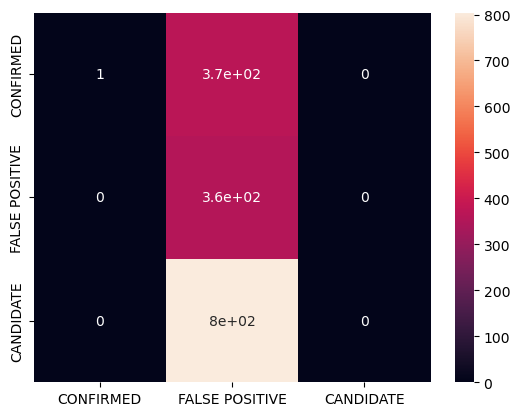

,CONFIRMED,FALSE POSITIVE,CANDIDATE
CONFIRMED,1,370,0
FALSE POSITIVE,0,356,0
CANDIDATE,0,804,0


In [480]:
y_true = np.argmax(y_vld, axis=1)
y_hat = gnb.predict(X_vld)
acc = accuracy_score(y_true, y_hat)
print(f"Valadation Accuracy: {acc}")

plot_confusion_matrix(y=y_true, y_hat=y_hat, class_names=class_names)

#### Testing

Testing Accuracy: 0.23732357553580763


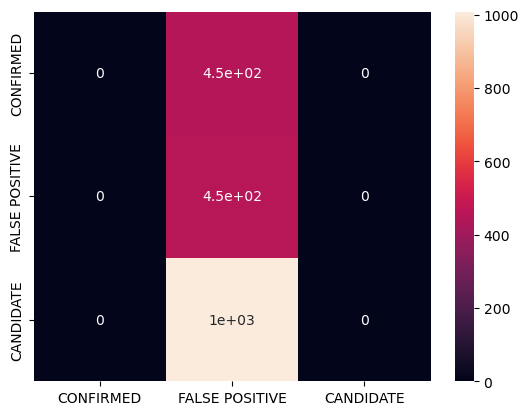

,CONFIRMED,FALSE POSITIVE,CANDIDATE
CONFIRMED,0,451,0
FALSE POSITIVE,0,454,0
CANDIDATE,0,1008,0


In [485]:
y_true = np.argmax(y_tst, axis=1)
y_hat = gnb.predict(X_tst)
acc = accuracy_score(y_true, y_hat)
print(f"Testing Accuracy: {acc}")

plot_confusion_matrix(y=y_true, y_hat=y_hat, class_names=class_names)

# Neural Networks

### Metrics

In [491]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse

### Activation Functions

#### Linear Activation

In [495]:
class Linear():
    """ The linear or identity actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the linear activation function """
        # TODO 3.1
        return z
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative for the linear activation function """
        # TODO 3.2
        return np.ones(z.shape)

Input x shape: (100, 1)
Activation y shape: (100, 1)
Derivative dy shape: (100, 1)


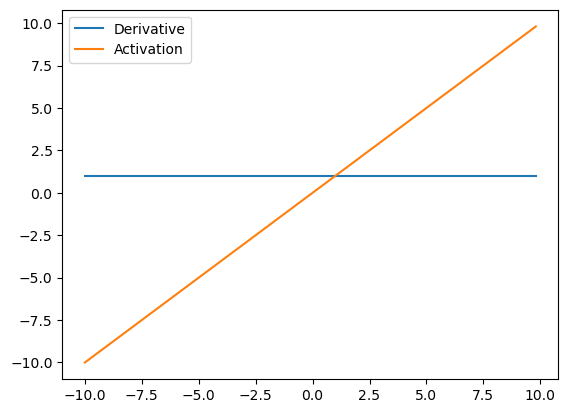

In [497]:
def TEST_Linear():
    x = np.arange(-10, 10 , .2).reshape(-1, 1)
    y = Linear.activation(x)
    dy = Linear.derivative(x)

    print(f"Input x shape: {x.shape}")
    print(f"Activation y shape: {y.shape}")
    print(f"Derivative dy shape: {dy.shape}")

    plt.plot(x ,dy, label='Derivative')
    plt.plot(x ,y, label='Activation')
    plt.legend()

TEST_Linear()

#### Tanh Activation

In [500]:
class Tanh():
    """ The tanh actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the tanh activation function """
        # TODO 4.1
        return np.tanh(z)

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative of the tanh activation function """
        # TODO 4.2
        return 1 - np.tanh(z)**2

Input x shape: (100, 1)
Activation y shape: (100, 1)
Derivative dy shape: (100, 1)


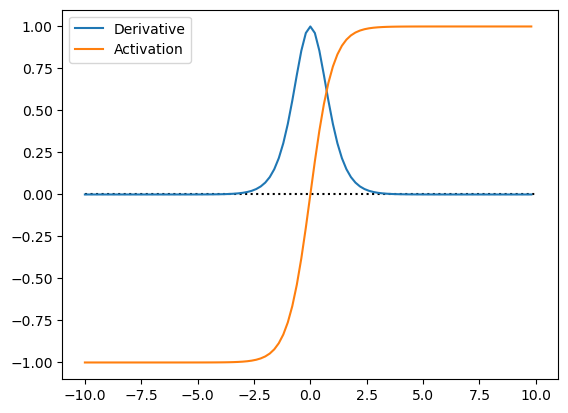

In [502]:
def TEST_Tanh():
    x = np.arange(-10, 10 , .2).reshape(-1, 1)
    y = Tanh.activation(x)
    dy = Tanh.derivative(x)

    print(f"Input x shape: {x.shape}")
    print(f"Activation y shape: {y.shape}")
    print(f"Derivative dy shape: {dy.shape}")

    plt.hlines(0, xmin=-10, xmax=10, colors='black', linestyles='dotted')
    plt.plot(x ,dy, label='Derivative')
    plt.plot(x ,y, label='Activation')
    plt.legend()
    plt.show();

TEST_Tanh()

### Initialize Weights

In [505]:
def init_weights(
    n_input_features: int, 
    hidden_neurons: int, 
    output_neurons: int, 
) -> Tuple[np.ndarray, ...]:
    """ Initilize the hidden and output layer parameters
        
        Args:
            n_input_features: The number of input features

            hidden_neurons: The number of hidden neurons or units to 
                use in the hidden layer.

            output_neurons: The number of output neurons to use in 
                the output layer.

        Returns:
            A tuple of NumPy arrays containing the weights and biases
            for the hidden and output layers.
    """
    # TODO 5
    W1, b1, W2, b2 = None, None, None, None

    W1 = np.random.uniform(low=-0.5, high=0.5, size=(n_input_features, hidden_neurons))
    b1 = np.ones([1, hidden_neurons])
    
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(hidden_neurons, output_neurons))
    b2 = np.ones([1, output_neurons])
    
    return W1, b1, W2, b2

In [507]:
def TEST_init_weights():
    # Init weights and baises
    n, hn, on = 4, 2, 1
    np.random.seed(42)
    W1, b1, W2, b2 = init_weights(
        n_input_features=n,
        hidden_neurons=hn,
        output_neurons=on
    )
    print(f"Hidden layer W1 shape: {W1.shape}")
    print(f"Hidden layer b1 shape: {b1.shape}")
    print(f"Output layer W2 shape: {W2.shape}")
    print(f"Output layer b2 shape: {b2.shape}")

TEST_init_weights()

Hidden layer W1 shape: (4, 2)
Hidden layer b1 shape: (1, 2)
Output layer W2 shape: (2, 1)
Output layer b2 shape: (1, 1)


### Forward Pass

In [510]:
def forward(
    X: np.ndarray, 
    W1: np.ndarray, 
    b1: np.ndarray,
    W2: np.ndarray, 
    b2: np.ndarray, 
) -> Tuple[np.ndarray, ...]:
    """ Forward pass for 2 layer neural network
    
        Args:
            X: Input features
            
            W1: Hidden layer weights 
            
            b1: Hidden layer baises

            W2: Output layer weights 
            
            b2: Output layer baises

        Returns:
            A tuple of NumPy arrays containing the linear combination and 
            acitvation outputs for each layer. These are needed to compute 
            the backward pass.
    """
    Z1, A1, Z2, A2 = None, None, None, None
    # TODO 6
    Z1 = X @ W1 + b1
    A1 = Tanh.activation(Z1)

    Z2 = A1 @ W2 + b2
    A2 = Linear.activation(Z2)
    
    return Z1, A1, Z2, A2

In [512]:
def TEST_forward():
    X, y = nonlinear_data()
    np.random.seed(42)
    n, hn, on = X.shape[1], 2, 1
    W1, b1, W2, b2 = init_weights(
        n_input_features=n,
        hidden_neurons=hn,
        output_neurons=on
    )
    Z1, A1, Z2, A2 = forward(X=X, W1=W1, b1=b1, W2=W2, b2=b2)
    mse_score = mse(y, A2)
    print(f'Z1 shape: {Z1.shape}')
    print(f'A1 shape: {A1.shape}')
    print(f'Z2 shape: {Z2.shape}')
    print(f'A2 or y_hat shape: {A2.shape}')
    print(f"MSE after 1 forward pass: {mse_score}")

TEST_forward()

Z1 shape: (100, 2)
A1 shape: (100, 2)
Z2 shape: (100, 1)
A2 or y_hat shape: (100, 1)
MSE after 1 forward pass: 12.668507283698458


### Backward Pass

In [515]:
def output_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the output layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the output layer weights and biases.
    """
    # TODO 7
    W2_avg_grad, b2_avg_grad = None, None

    A2_MSE = A2 - y
    A2_Z2 = Linear.derivative(Z2)
    Z2_W2 = A1

    Z2_MSE = A2_MSE * A2_Z2
    W2_MSE = Z2_W2.T @ Z2_MSE 
    W2_avg_grad = W2_MSE / len(y) 

    Z2_b2 = np.ones([len(y), 1])
    b2_MSE = Z2_b2.T @  Z2_MSE   
    b2_avg_grad = b2_MSE / len(y) 
    
    return W2_avg_grad, b2_avg_grad

In [517]:
def TEST_output_layer_grads():
    X, y = nonlinear_data()
    np.random.seed(42)
    n, hn, on = X.shape[1], 2, 1
    W1, b1, W2, b2 = init_weights(
        n_input_features=n,
        hidden_neurons=hn,
        output_neurons=on
    )
    Z1, A1, Z2, A2 = forward(X=X, W1=W1, b1=b1, W2=W2, b2=b2)
    W2_avg_grad, b2_avg_grad = output_layer_grads(X, y, W1, Z1, A1, W2, Z2, A2)
    print(f"W2_avg_grad shape: {W2_avg_grad.shape}")
    print(f"W2_avg_grad:\n{W2_avg_grad}")
    print(f"b2_avg_grad shape: {b2_avg_grad.shape}")
    print(f"b2_avg_grad: {b2_avg_grad}")

TEST_output_layer_grads()

W2_avg_grad shape: (2, 1)
W2_avg_grad:
[[-1.9263721 ]
 [-1.90699268]]
b2_avg_grad shape: (1, 1)
b2_avg_grad: [[-2.98494501]]


### Hidden Layer

In [544]:
def hidden_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the hidden layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the hidden layer weights and biases.
    """
    # TODO 8
    W1_avg_grad, b1_avg_grad = None, None

    A2_MSE = A2 - y
    A2_Z2 = Linear.derivative(Z2)
    Z2_A1 = W2
    A1_Z1 = Tanh.derivative(Z1)
    Z1_W1 = X

    A1_MSE = (A2_MSE * A2_Z2) @ Z2_A1.T  
    W1_MSE = Z1_W1.T @ (A1_MSE * A1_Z1)
    W1_avg_grad = W1_MSE / len(y)

    Z1_b1 = np.ones([len(y), 1])

    A1_MSE = (A2_MSE * A2_Z2) @ Z2_A1.T
    b1_MSE =  Z1_b1.T @ (A1_MSE * A1_Z1)
    b1_avg_grad = b1_MSE / len(y)
    
    return W1_avg_grad, b1_avg_grad

In [546]:
def TEST_output_layer_grads():
    X, y = nonlinear_data()
    np.random.seed(42)
    n, hn, on = X.shape[1], 2, 1
    W1, b1, W2, b2 = init_weights(
        n_input_features=n,
        hidden_neurons=hn,
        output_neurons=on
    )
    Z1, A1, Z2, A2 = forward(X=X, W1=W1, b1=b1, W2=W2, b2=b2)
    W1_avg_grad, b1_avg_grad = hidden_layer_grads(X, y, W1, Z1, A1, W2, Z2, A2)
    print(f"W1_avg_grad shape: {W1_avg_grad.shape}")
    print(f"W1_avg_grad:\n{W1_avg_grad}")
    print(f"b1_avg_grad shape: {b1_avg_grad.shape}")
    print(f"b1_avg_grad: {b1_avg_grad}")

TEST_output_layer_grads()

W1_avg_grad shape: (3, 2)
W1_avg_grad:
[[ 0.71188803  0.433636  ]
 [-0.15409518  0.11297837]
 [ 0.29699145 -0.09406183]]
b1_avg_grad shape: (1, 2)
b1_avg_grad: [[ 0.69360168 -0.41074079]]


### Neural Network Class

In [549]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [551]:
class NeuralNetwork():
    def __init__(self,
        hidden_neurons: int,
        output_neurons: int,
        alpha: float, 
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):
        """ A two layer neural network using SGD
            
            Attributes:
                hidden_neurons: Number of hidden units/neurons.
                
                output_neurons: Number of output neuorns
                
                alpha: learning rate or step size.
                
                batch_size: Size of mini-batches for mini-batch gradient
                    descent.
                
                epochs: Number of epochs to run for mini-batch
                    gradient descent.
                    
                seed: Seed to be used for NumPy's RandomState class
                    or universal seed np.random.seed() function.
    
                W1: Hidden layer weights with shape (inputs, neurons)
                
                b1: Hidden layer baises with shape (1, neurons)
                
                W2: Output layer weights with shape (inputs, neurons)
                
                b2: Output layer baises with shape (1, neurons)
    
                trn_error: Stores the training error for each epoch.
    
                vld_error: Stores the validation error for each epoch.
        """
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(
        self,
        X: np.ndarray, 
        y: np.ndarray,
        X_vld: np.ndarray = None, 
        y_vld:np.ndarray = None,
    ): 
        """ Trains a basic two layer neural network using SGD
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector

                X_vld: Validation data given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.

                y_vld: Validation labels given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.
                
            Returns:
                The class's own object reference. 
        """
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        # TODO 9.1
        self.W1, self.b1, self.W2, self.b2 = init_weights(X.shape[1], self.hidden_neurons, self.output_neurons)
        for e in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)
            for b in batches:
                Z1, A1, Z2, A2 = forward(X[b], self.W1, self.b1, self.W2, self.b2)

                W2_avg_grad, b2_avg_grad = output_layer_grads(X[b], y[b], self.W1, Z1, A1, self.W2, Z2, A2)
                W1_avg_grad, b1_avg_grad = hidden_layer_grads(X[b], y[b], self.W1, Z1, A1, self.W2, Z2, A2)

                self.W2 -= self.alpha * W2_avg_grad
                self.b2 -= self.alpha * b2_avg_grad
                self.W1 -= self.alpha * W1_avg_grad
                self.b1 -= self.alpha * b1_avg_grad

            y_hat = self.predict(X)
            trn_rmse = rmse(y, y_hat)
            self.trn_error.append(trn_rmse)

            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_rmse = rmse(y_vld, vld_preds)
                self.vld_error.append(vld_rmse)
                
        return self

    def predict(self, X: np.ndarray):
        """ Make predictions using forward pass.

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        # TODO 9.2
        _, _, _, A2 = forward(X, self.W1, self.b1, self.W2, self.b2)
        return A2

Train MSE: 0.16430898806918104
Validation MSE: 0.26360411303813214


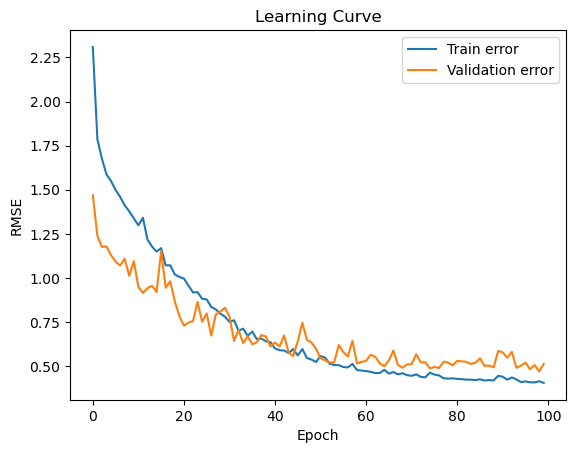

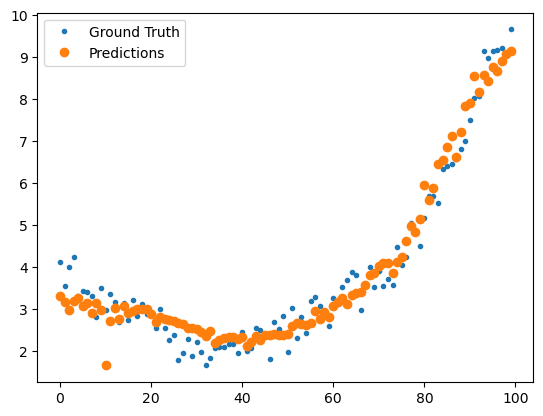

In [553]:
def TEST_NeuralNetwork():
    X, y = nonlinear_data()
    X_trn, X_vld, y_trn, y_vld = train_test_split(X, y, random_state=42)
    nn = NeuralNetwork(
        hidden_neurons=25,
        output_neurons=1,
        batch_size=64,
        alpha=0.05,
        epochs=100,
        seed=0,
    )
    nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
    y_hat_trn = nn.predict(X_trn)
    trn_mse_score = mse(y_trn, y_hat_trn)
    print(f"Train MSE: {trn_mse_score}")
    
    y_hat_vld = nn.predict(X_vld)
    vld_mse_score = mse(y_vld, y_hat_vld)
    print(f"Validation MSE: {vld_mse_score}")

    plt.plot(nn.trn_error, label='Train error')
    plt.plot(nn.vld_error, label='Validation error')
    plt.title("Learning Curve")
    plt.ylabel("RMSE")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    plt.plot(y, '.', label='Ground Truth')
    plt.plot(nn.predict(X), 'o', label='Predictions')
    plt.legend()
    plt.show()

TEST_NeuralNetwork()

### Dataset Training

In [558]:
# TODO 10
from sklearn.metrics import accuracy_score

nn = None
nn = NeuralNetwork(hidden_neurons=25, output_neurons=1, batch_size=32, alpha=0.025, epochs=300, seed=42)
# nn = NeuralNetwork(hidden_neurons=25, output_neurons=1, batch_size=64, alpha=0.05, epochs=225, seed=0)

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_true = np.argmax(y_trn, axis=1)
y_hat = nn.predict(X_trn)
trn_mse = mse(y_true, y_hat)
trn_rmse = rmse(y_true, y_hat)

y_true = np.argmax(y_vld, axis=1)
vld_preds = nn.predict(X_vld)
vld_mse = mse(y_true, vld_preds)
vld_rmse = rmse(y_true, vld_preds)

y_true = np.argmax(y_tst, axis=1)
tst_preds = nn.predict(X_tst)
tst_mse = mse(y_true, tst_preds)
tst_rmse = rmse(y_true, tst_preds)

print(f"Training MSE: {trn_mse}")
print(f"Training RMSE: {trn_rmse}")
print(f"Validation MSE: {vld_mse}")
print(f"Validation RMSE: {vld_rmse}")
print(f"Testing MSE: {tst_mse}")
print(f"Testing RMSE: {tst_rmse}")

plt.plot(nn.trn_error, label='train')
plt.plot(nn.vld_error, label='valid')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)